In [1]:
import numpy as np
import healpy as hp
from healpy.newvisufunc import projview
from astropy.table import Table

import matplotlib
from matplotlib import pyplot as plt

In [2]:
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['axes.labelsize'] = 22
matplotlib.rcParams['legend.fontsize'] = 18

matplotlib.rc('text', usetex=True)

## Parameters

In [3]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)

In [4]:
G_max = 20.0

## Quasar catalog

In [5]:
fn_gaia = f'../data/gaia_G{G_max}.fits'
tab_gaia = Table.read(fn_gaia)
N_data = len(tab_gaia)
print(f"Number of data sources: {N_data}")

Number of data sources: 648842


In [6]:
print(f"Column names: {tab_gaia.columns}")

Column names: <TableColumns names=('ra','dec','redshift_qsoc','l','b','source_id','parallax','parallax_error','pmra','pmra_error','pmdec','pmdec_error','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','redshift_qsoc_lower','redshift_qsoc_upper','zscore_qsoc','flags_qsoc','allwise_oid','w1mpro','w2mpro','g_rp','bp_g','bp_rp','g_w1','w1_w2','ebv','A_v','pm','redshift_spz','redshift_sdss')>


### Make map of quasar number counts

In [7]:
pixel_indices = hp.ang2pix(NSIDE, tab_gaia['ra'], tab_gaia['dec'], lonlat=True)
map_nqso_data = np.bincount(pixel_indices, minlength=NPIX)

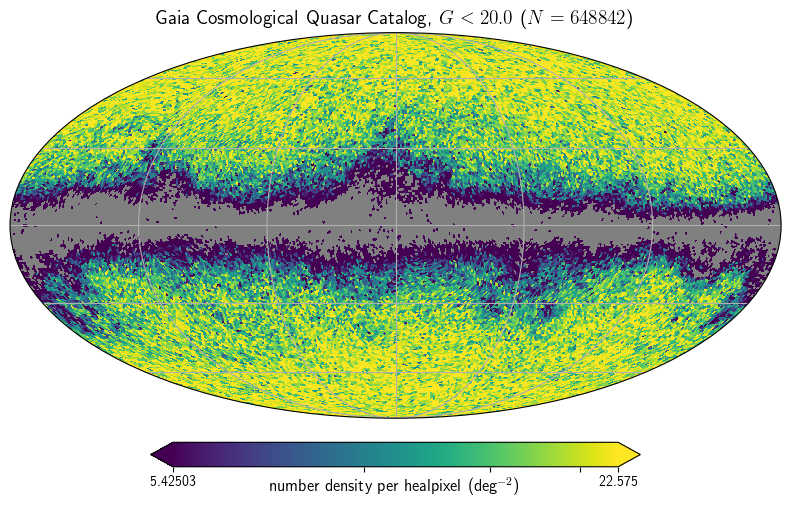

In [8]:
projview(map_nqso_data, title=rf"Gaia Cosmological Quasar Catalog, $G<{G_max}$ ($N={N_data}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap='viridis', coord=['C', 'G'], 
            min=np.median(map_nqso_data)-np.std(map_nqso_data), max=np.median(map_nqso_data)+np.std(map_nqso_data), 
            norm='log', graticule=True,
            show_tickmarkers=True)#cbar_ticks=[5, 10, 20, 50, 100]) 

## Selection function model

In [9]:
fn_sel = f"../data/maps/map_probability_dust_stars_m10_NSIDE64_G{G_max}.fits"
map_sel = hp.read_map(fn_sel)

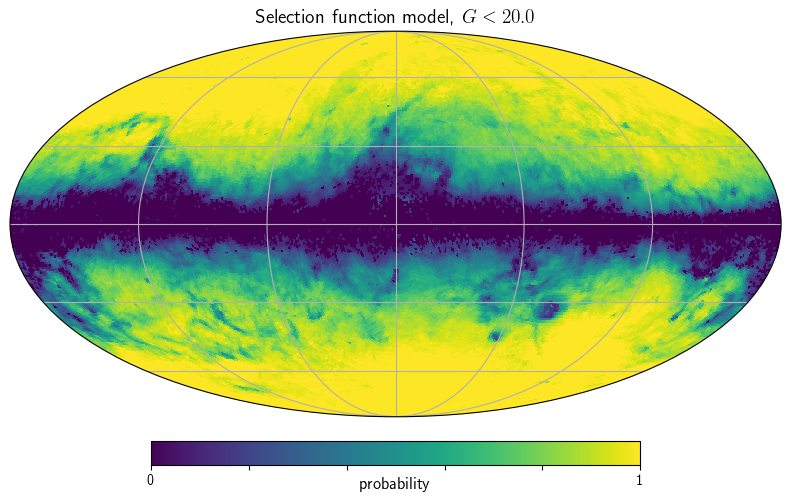

In [10]:
projview(map_sel, title=rf"Selection function model, $G<{G_max}$",
            unit=r"probability", cmap='viridis', coord=['C', 'G'], 
            graticule=True,
            show_tickmarkers=True,
            ) 

## Random catalog

In [11]:
fn_rand = f'../data/randoms/random_stardustm10_NSIDE64_G{G_max}_10x.fits'
tab_rand = Table.read(fn_rand)
N_rand = len(tab_rand)
print(f"Number of random sources: {N_rand}")

Number of random sources: 6489060


In [12]:
print(f"Column names: {tab_rand.columns}")

Column names: <TableColumns names=('ra','dec','ebv')>


### Make map of random number counts

In [13]:
pixel_indices = hp.ang2pix(NSIDE, tab_rand['ra'], tab_rand['dec'], lonlat=True)
map_nqso_rand = np.bincount(pixel_indices, minlength=NPIX)

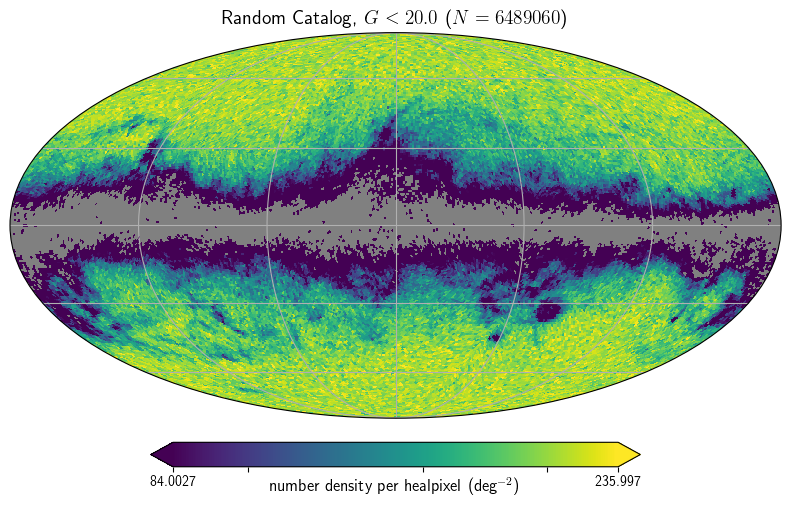

In [14]:
projview(map_nqso_rand, title=rf"Random Catalog, $G<{G_max}$ ($N={N_rand}$)",
            unit=r"number density per healpixel (deg$^{-2}$)", cmap='viridis', coord=['C', 'G'], 
            min=np.median(map_nqso_rand)-np.std(map_nqso_rand), max=np.median(map_nqso_rand)+np.std(map_nqso_rand), 
            norm='log', graticule=True,
            show_tickmarkers=True)#, cbar_ticks=[5, 10, 20, 50, 100, 500, 1000]) 

In [15]:
norm_factor = N_data/N_rand
map_residuals = norm_factor*map_nqso_rand - map_nqso_data

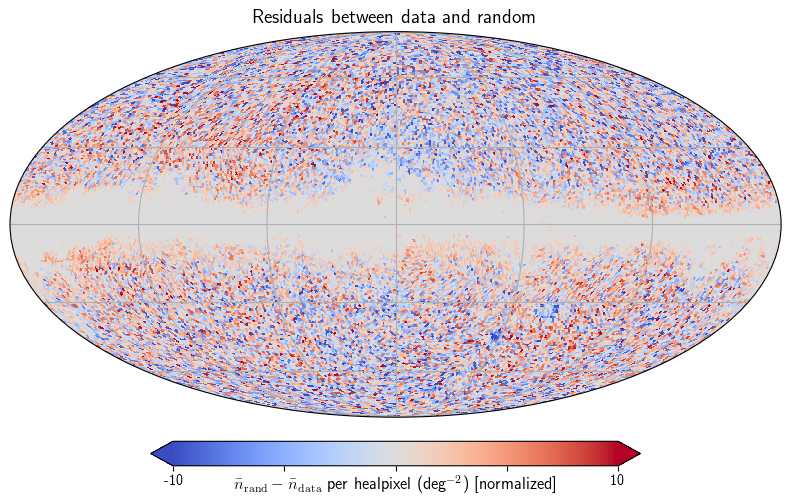

In [16]:
projview(map_residuals, title=rf"Residuals between data and random",
            unit=r"$\bar{n}_\mathrm{rand} - \bar{n}_\mathrm{data}$ per healpixel (deg$^{-2}$) [normalized]", cmap='coolwarm', coord=['C', 'G'], 
            min=-10, max=10, graticule=True,
            show_tickmarkers=True)#cbar_ticks=[5, 10, 20, 50, 100, 500, 1000]) 